In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [5]:
df = pd.read_excel('zepto_blinkit.xlsx')
df.head()

,Blinkit,Zepto
0,14.0,10
1,18.0,20
2,19.0,12
3,28.0,21
4,15.0,17


In [7]:
df.shape

(34, 2)

### 1. EDA & Visualization

In [17]:

mean_blinkit = df['Blinkit'].mean()
mean_zepto = df['Zepto'].mean()
size_blinkit = df['Blinkit'].count()
size_zepto = df['Zepto'].count()
min_blinkit = df['Blinkit'].min()
max_blinkit = df['Blinkit'].max()
median_blinkit = df['Blinkit'].median()
min_zepto = df['Zepto'].min()
max_zepto = df['Zepto'].max()
median_zepto = df['Zepto'].median()


print(f"Blinkit: Mean = {mean_blinkit:.2f} minutes, Median = {median_blinkit:.2f} minutes, Min = {min_blinkit} minutes, Max = {max_blinkit} minutes (Sample Size: {size_blinkit})")
print(f"Zepto: Mean = {mean_zepto:.2f} minutes, Median = {median_zepto:.2f} minutes, Min = {min_zepto} minutes, Max = {max_zepto} minutes (Sample Size: {size_zepto})")


Blinkit: Mean = 19.48 minutes, Median = 19.00 minutes, Min = 12.0 minutes, Max = 31.0 minutes (Sample Size: 23)
Zepto: Mean = 15.82 minutes, Median = 15.00 minutes, Min = 10 minutes, Max = 24 minutes (Sample Size: 34)


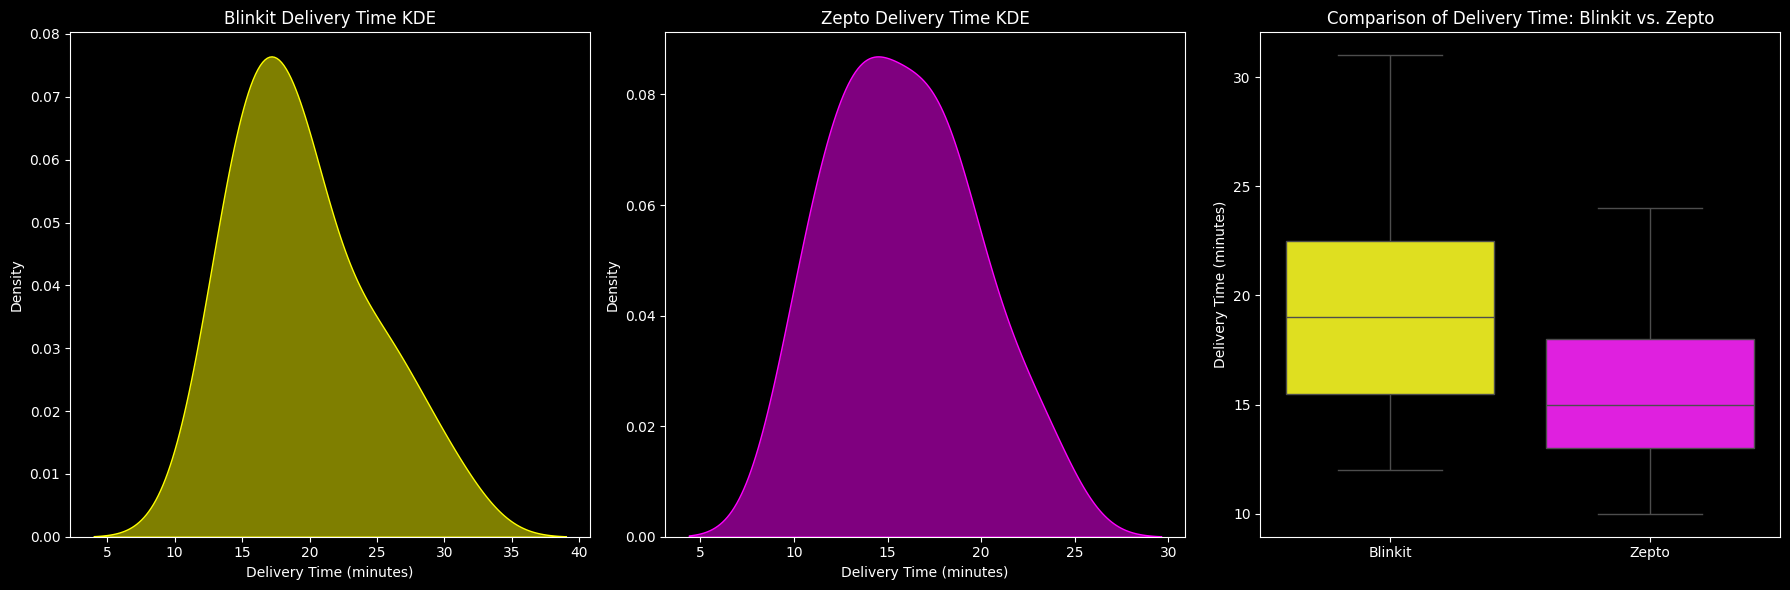

In [27]:
plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sns.kdeplot(df['Blinkit'], fill=True, color='yellow', alpha=0.5)
plt.title('Blinkit Delivery Time KDE')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')


plt.subplot(1, 3, 2)
sns.kdeplot(df['Zepto'], fill=True, color='magenta', alpha=0.5)
plt.title('Zepto Delivery Time KDE')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')


plt.subplot(1, 3, 3)
sns.boxplot(data=df, palette=['yellow', 'magenta']) 
plt.title('Comparison of Delivery Time: Blinkit vs. Zepto')
plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.savefig('delivery_time_plots.png', dpi=300, bbox_inches='tight')
plt.show()

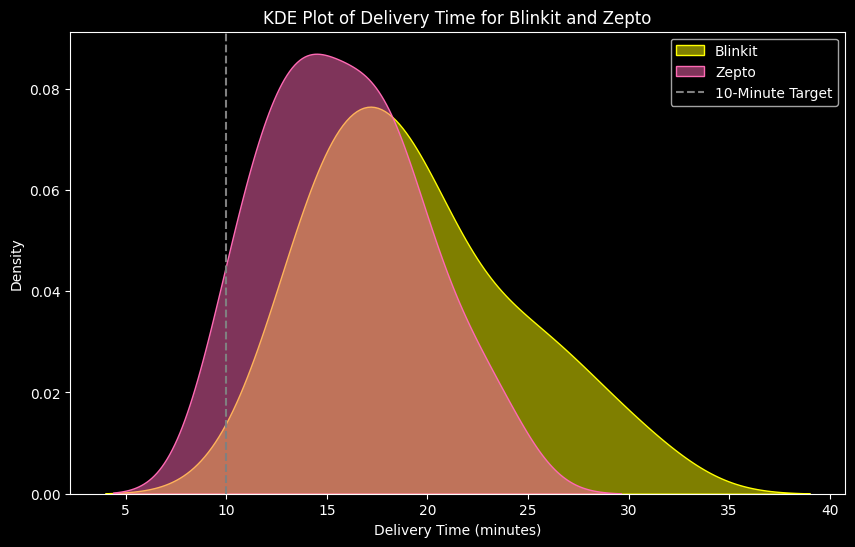

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Blinkit'], color='yellow', label='Blinkit', fill=True, alpha=0.5)
sns.kdeplot(df['Zepto'], color='hotpink', label='Zepto', fill=True, alpha=0.5)

# Add a vertical line for the 10-minute delivery time
plt.axvline(x=10, color='gray', linestyle='--', label='10-Minute Target')


plt.title('KDE Plot of Delivery Time for Blinkit and Zepto')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')
plt.legend()

plt.savefig('10mins_comp.png', dpi=300, bbox_inches='tight')
plt.show()

### 2. Hypothesis Testing

#### 2.1 Hypothesis Testing for 10-Minute Delivery Time

__Null Hypothesis (H0):__ The mean delivery time for Blinkit (or Zepto) is equal to 10 minutes.

__Alternative Hypothesis (H1):__ The mean delivery time for Blinkit (or Zepto) is not equal to 10 minutes.

__Test Statistic:__ We can use a one-sample t-test since we are comparing the sample mean to a known value (10 minutes).

__Significance Level:__ Typically, we use a significance level of 𝛼 = 0.05


In [19]:

blinkit_times = [14, 18, 19, 28, 15, 14, 12, 31, 24, 20, 
                 19, 17, 15, 16, 18, 16, 27, 19, 15, 25, 
                 21, 24, 21]
zepto_times = [10, 20, 12, 21, 17, 11, 10, 17, 18, 
                19, 15, 12, 14, 15, 14, 17, 12, 22, 
                14, 13, 12, 18, 10, 19, 24, 17, 18, 
                15, 13, 20, 23]

blinkit_array = np.array(blinkit_times)
zepto_array = np.array(zepto_times)


alpha = 0.05

# One-sample t-test for Blinkit
t_statistic_blinkit, p_value_blinkit = stats.ttest_1samp(blinkit_array, 10)
print(f"Blinkit: t-statistic = {t_statistic_blinkit:.2f}, p-value = {p_value_blinkit:.4f}")


if p_value_blinkit < alpha:
    print("Reject the null hypothesis for Blinkit: The mean delivery time is significantly different from 10 minutes.")
else:
    print("Fail to reject the null hypothesis for Blinkit: The mean delivery time is not significantly different from 10 minutes.")

# One-sample t-test for Zepto
t_statistic_zepto, p_value_zepto = stats.ttest_1samp(zepto_array, 10)
print(f"Zepto: t-statistic = {t_statistic_zepto:.2f}, p-value = {p_value_zepto:.4f}")


if p_value_zepto < alpha:
    print("Reject the null hypothesis for Zepto: The mean delivery time is significantly different from 10 minutes.")
else:
    print("Fail to reject the null hypothesis for Zepto: The mean delivery time is not significantly different from 10 minutes.")



Blinkit: t-statistic = 9.09, p-value = 0.0000
Reject the null hypothesis for Blinkit: The mean delivery time is significantly different from 10 minutes.
Zepto: t-statistic = 8.26, p-value = 0.0000
Reject the null hypothesis for Zepto: The mean delivery time is significantly different from 10 minutes.


**Conclusion: Both Blinkit and Zepto have delivery times that are significantly different from the assumed delivery time of 10 minutes at a 5% significance level. The very low p-values for both services indicate that customers can expect longer delivery times from both. When comparing the two services.**

#### 2.2 Comparison Between Blinkit and Zepto

__Null Hypothesis (H0):__ The mean delivery times for Blinkit and Zepto are equal.

__Alternative Hypothesis (H1):__ The mean delivery times for Blinkit and Zepto are not equal.

__Test Statistic:__ We can use an independent two-sample t-test since we are comparing the means of two independent samples.

__Significance Level:__ We will use a significance level of 𝛼 = 0.05.

In [20]:

t_statistic_comparison, p_value_comparison = stats.ttest_ind(blinkit_array, zepto_array)
print(f"Comparison: t-statistic = {t_statistic_comparison:.2f}, p-value = {p_value_comparison:.4f}")


if p_value_comparison < alpha:
    print("Reject the null hypothesis: The mean delivery times for Blinkit and Zepto are significantly different.")
else:
    print("Fail to reject the null hypothesis: The mean delivery times for Blinkit and Zepto are not significantly different.")

Comparison: t-statistic = 2.96, p-value = 0.0046
Reject the null hypothesis: The mean delivery times for Blinkit and Zepto are significantly different.


**Conclusion:The analysis shows that at the 5% significance level, the mean delivery times for Blinkit and Zepto are significantly different, as indicated by the t-statistic of 2.96 and the p-value of 0.0046. This suggests that customers can expect varying delivery experiences between the two services, with one likely being faster or slower than the other.**